# 1. Import

In [38]:
#Libraries
import os
import pandas as pd
import numpy as np 
import math

from sklearn.preprocessing import OneHotEncoder
#Dataset
from sklearn import datasets

#Plot
import matplotlib.pyplot as plt

#sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# 2. Loading Iris dataset 

In [39]:
# load iris dataset
iris = datasets.load_iris()
# Since this is a bunch, create a dataframe
iris_df=pd.DataFrame(iris.data)
iris_df['class']=iris.target

iris_df.columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'] #Naming the columns
iris_df.dropna(how="all", inplace=True) # remove any empty lines
df = iris_df.drop(['petal_length', 'petal_width'], axis=1, inplace=True)  #since the exp doesnt deal with these columns
df = iris_df[iris_df['class'] != 2] #getting rid of all rows with class = 2

# 3. Splitting the dataset into training, validation and testing

In [40]:
# split into train, validation test sets
df_train, df_validate, df_test = np.split(df.sample(frac=1), [int(.8*len(df)), int(.9*len(df))])

## Visualizing Iris dataset

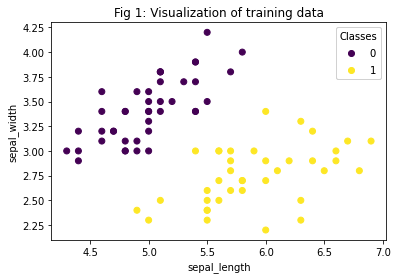

In [41]:
# Visualization of iris data
fig, ax = plt.subplots()
plt.title('Fig 1: Visualization of training data')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
scatter = plt.scatter(df_train['sepal_length'], df_train['sepal_width'], c=df_train['class'])
legend = ax.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
ax.add_artist(legend)
plt.show()


# 4. Fitting logistic regression model

## Linear decision boundary calculated by logistic regression

C:\Users\shehn\AppData\Local\R-MINI~1\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\shehn\AppData\Local\R-MINI~1\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  app.launch_new_instance()


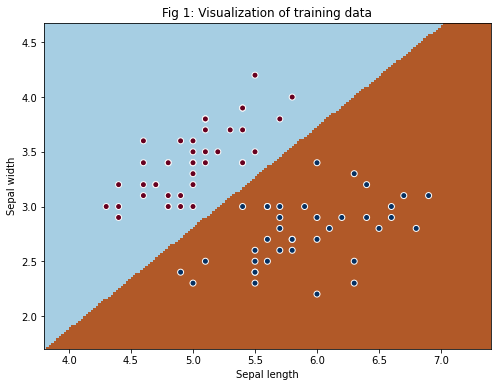

In [42]:
df_x = df_train.iloc[:, : 2]
df_y = df_train.iloc[:, [-1]]
logReg = LogisticRegression(C=1e5)
logReg.fit(df_x, df_y)

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = df_x['sepal_length'].min() - .5, df_x['sepal_length'].max() + .5
y_min, y_max = df_x['sepal_width'].min() - .5, df_x['sepal_width'].max() + .5
h = .02  # step size in the mesh

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
probs = logReg.predict(np.c_[xx.ravel(), yy.ravel()])
probs = probs.reshape(xx.shape)

plt.figure(1, figsize=(8, 6))
plt.pcolormesh(xx, yy, probs, cmap=plt.cm.Paired)
plt.scatter(df_x['sepal_length'], df_x['sepal_width'], c=df_y['class'], edgecolors='white', cmap="RdBu")
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Fig 1: Visualization of training data')
plt.show()

# 5. Performance metrics

In [43]:
x_train = df_train.iloc[:, : 2] #Accessing the first two columns of df_train
y_train = df_train.iloc[:, [-1]]  #Accessing the last column of df_train
x_test = df_test.iloc[:, : 2]
y_test = df_test.iloc[:, [-1]]
x_validate = df_validate.iloc[:, : 2]
y_validate = df_validate.iloc[:, [-1]]

In [44]:
def misclassfication(x_train, y_train, x_test, y_test):
    logReg = LogisticRegression()
    logReg = logReg.fit(x_train, y_train)
    y_pred = logReg.predict(x_test)
    misclass_percent = (1 - metrics.accuracy_score(y_test, y_pred))
    return misclass_percent

## For Validate dataset

In [45]:
print("validation misclassification percentage = ", misclassfication(x_train, y_train, x_validate, y_validate))

validation misclassification percentage =  0.0


C:\Users\shehn\AppData\Local\R-MINI~1\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


## For test dataset

In [46]:
print("validation misclassification percentage = ", misclassfication(x_train, y_train, x_test, y_test))

validation misclassification percentage =  0.0


C:\Users\shehn\AppData\Local\R-MINI~1\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
